In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps

from api_keys import g_key

In [2]:
airports_df = pd.read_csv('./Resource Files/airports.csv')
airports_df.rename(columns={'IATA': 'Code'}, inplace=True)
airports_df


,Code,AIRPORT,City,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ADK,Adak,Adak,AK,USA,51.877964,-176.646031
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,BRW,Wiley Post Will Rogers Memorial,Barrow,AK,USA,71.285448,-156.766002
3,BET,Bethel,Bethel,AK,USA,60.779776,-161.837998
4,CDV,Merle K (Mudhole) Smith,Cordova,AK,USA,60.491834,-145.477650
...,...,...,...,...,...,...,...
336,RKS,Rock Springs-Sweetwater County,Rock Springs,WY,USA,41.594217,-109.065193
337,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
338,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
339,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302


In [3]:
zillow_df=pd.read_csv('./Resource Files/Zillow.csv')
zillow_df
#list(zillow_df)

,RegionID,SizeRank,City,RegionType,StateName,State,Metro,CountyName,1/31/1996,2/29/1996,...,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021
0,28124,21482,Anchor Point,City,AK,AK,NaN,Kenai Peninsula Borough,NaN,NaN,...,177446,178979,180275,181152,182632,184261,185641,186201,187226,187923
1,23482,75,Anchorage,City,AK,AK,Anchorage,Anchorage Borough,124382.0,124813.0,...,325109,327167,328447,329679,333744,337350,342606,346383,348342,349256
2,50997,16107,Big Lake,City,AK,AK,Anchorage,Matanuska Susitna Borough,NaN,NaN,...,180589,180263,179999,180947,181409,182209,182958,182468,180942,179412
3,4089,20490,Chiniak,City,AK,AK,NaN,Kodiak Island Borough,NaN,NaN,...,244124,245467,246982,248377,249151,249097,250023,251322,253995,255739
4,10832,29449,Clam Gulch,City,AK,AK,NaN,Kenai Peninsula Borough,NaN,NaN,...,194203,195920,197728,199309,201143,203076,204630,205864,207080,208053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25597,48466,6204,Wheatland,City,WY,WY,NaN,Platte County,NaN,NaN,...,222651,222849,223067,223429,223755,224419,225217,226078,227099,228388
25598,14671,10281,Wilson,City,WY,WY,Jackson,Teton County,NaN,NaN,...,1804165,1792924,1782245,1768537,1761790,1754819,1752594,1738168,1723221,1705122
25599,23322,6655,Worland,City,WY,WY,NaN,Washakie County,NaN,NaN,...,172355,172459,172821,173305,173875,174456,175162,175941,176939,177760
25600,34921,29449,Wright,City,WY,WY,Gillette,Campbell County,NaN,NaN,...,232114,230455,228712,227385,226223,225063,223787,222605,221723,220420


In [4]:
zillow_df_sorted = zillow_df.sort_values(by=['State', 'City'])
del zillow_df_sorted['StateName']

arizona_sales=zillow_df_sorted[zillow_df_sorted['State']=='AZ']
arizona_sales

,RegionID,SizeRank,City,RegionType,State,Metro,CountyName,1/31/1996,2/29/1996,3/31/1996,...,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021
1204,16692,18938,Aguila,City,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,150775.0,152089.0,152969.0,...,297004,300031,303878,308432,313760,318353,322637,326776,328832,327638
1205,37066,10005,Ajo,City,AZ,Tucson,Pima County,50436.0,50564.0,50476.0,...,74984,75461,77023,79281,81493,82639,84135,85207,86333,86903
1206,30178,28515,Alpine,City,AZ,NaN,Apache County,NaN,NaN,NaN,...,262561,263808,265380,267081,269172,272345,275978,279870,283218,286686
1207,34971,19337,Amado,City,AZ,Tucson,Pima County,71040.0,71137.0,71118.0,...,151242,152768,154224,156542,158900,161200,163514,166436,168985,171457
1208,3418,2574,Anthem,City,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,164462.0,163424.0,162630.0,...,369381,372468,377103,382734,389058,395680,402829,411020,419507,429406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,50600,26880,Yarnell,City,AZ,Prescott,Yavapai County,63151.0,63882.0,64285.0,...,166209,166933,168084,170847,173073,176583,179932,184531,188932,193807
1399,41817,17676,Young,City,AZ,Payson,Gila County,NaN,69813.0,70104.0,...,231343,230416,230660,232075,234754,238201,240453,243686,246877,250169
1400,14747,8622,Youngtown,City,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,NaN,NaN,...,187179,188655,191044,194174,197400,201045,204870,209226,212870,216485
1401,9392,26286,Yucca,City,AZ,Lake Havasu City-Kingman,Mohave County,59814.0,59648.0,59559.0,...,162333,164115,165063,167515,168865,170043,171210,172132,173911,173775


In [5]:
zillow_df_sorted.to_csv('zillow.csv', index=False)        

In [6]:
airport_traffic_df = pd.read_csv('./Resource Files/airport_ratings_passengers.csv')
airport_traffic_df
del airport_traffic_df['Unnamed: 0']
airport_traffic_df


,Airport,Code,Originating Domestic Passengers 10%,Originating Domestic Passengers
0,"Los Angeles, CA: Los Angeles International",LAX,"1,564,494",15644940
1,"Chicago, IL: Chicago O'Hare International",ORD,"1,266,224",12662240
2,"Denver, CO: Denver International",DEN,"1,241,394",12413940
3,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",ATL,"1,128,009",11280090
4,"Boston, MA: Logan International",BOS,"1,043,353",10433530
...,...,...,...,...
381,"Telluride, CO: Telluride Regional",TEX,124,1240
382,"Dodge City, KS: Dodge City Regional",DDC,119,1190
383,"Provincetown, MA: Provincetown Municipal",PVC,118,1180
384,"Rutland, VT: Rutland - Southern Vermont Regional",RUT,114,1140


In [7]:
airport_traffic_df=airport_traffic_df.loc[airport_traffic_df['Originating Domestic Passengers']>=2000000]
len(airport_traffic_df)

52

In [8]:
airport_df=pd.merge(airport_traffic_df, airports_df, on="Code")
airport_df
airport_clean = airport_df.drop(['Airport', 'COUNTRY'], axis=1)
airport_clean.rename(columns={'STATE':'State'}, inplace=True)
airport_clean.to_csv('airport_clean', index=False)   
airport_clean
airport_code_list = airport_clean["Code"].tolist()
#airport_code_list

In [9]:
airport_clean.dropna(inplace=True)
airport_clean

,Code,Originating Domestic Passengers 10%,Originating Domestic Passengers,AIRPORT,City,State,LATITUDE,LONGITUDE
0,LAX,"1,564,494",15644940,Los Angeles International,Los Angeles,CA,33.942536,-118.408074
1,ORD,"1,266,224",12662240,Chicago O'Hare International,Chicago,IL,41.979595,-87.904464
2,DEN,"1,241,394",12413940,Denver Intl,Denver,CO,39.858408,-104.667002
3,ATL,"1,128,009",11280090,William B Hartsfield-Atlanta Intl,Atlanta,GA,33.640444,-84.426944
4,BOS,"1,043,353",10433530,Gen Edw L Logan Intl,Boston,MA,42.364348,-71.005179
5,SFO,"1,013,794",10137940,San Francisco International,San Francisco,CA,37.619002,-122.374843
6,SEA,"1,001,502",10015020,Seattle-Tacoma Intl,Seattle,WA,47.448982,-122.309313
7,EWR,"938,695",9386950,Newark Intl,Newark,NJ,40.692497,-74.168661
8,DFW,"935,860",9358600,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200
9,MCO,"873,096",8730960,Orlando International,Orlando,FL,28.428889,-81.316028


In [10]:
#2010 +
zillow_df_sorted
zillow_values = zillow_df_sorted.drop(columns=list(zillow_df_sorted)[7:175])
zillow_values

,RegionID,SizeRank,City,RegionType,State,Metro,CountyName,1/31/2010,2/28/2010,3/31/2010,...,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021
0,28124,21482,Anchor Point,City,AK,NaN,Kenai Peninsula Borough,144842.0,144938.0,145169.0,...,177446,178979,180275,181152,182632,184261,185641,186201,187226,187923
1,23482,75,Anchorage,City,AK,Anchorage,Anchorage Borough,269725.0,269375.0,269148.0,...,325109,327167,328447,329679,333744,337350,342606,346383,348342,349256
2,50997,16107,Big Lake,City,AK,Anchorage,Matanuska Susitna Borough,150550.0,150962.0,152046.0,...,180589,180263,179999,180947,181409,182209,182958,182468,180942,179412
3,4089,20490,Chiniak,City,AK,NaN,Kodiak Island Borough,NaN,NaN,NaN,...,244124,245467,246982,248377,249151,249097,250023,251322,253995,255739
4,10832,29449,Clam Gulch,City,AK,NaN,Kenai Peninsula Borough,149265.0,149034.0,149053.0,...,194203,195920,197728,199309,201143,203076,204630,205864,207080,208053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25597,48466,6204,Wheatland,City,WY,NaN,Platte County,131816.0,130737.0,129765.0,...,222651,222849,223067,223429,223755,224419,225217,226078,227099,228388
25598,14671,10281,Wilson,City,WY,Jackson,Teton County,1634743.0,1631133.0,1614518.0,...,1804165,1792924,1782245,1768537,1761790,1754819,1752594,1738168,1723221,1705122
25599,23322,6655,Worland,City,WY,NaN,Washakie County,135157.0,134832.0,134856.0,...,172355,172459,172821,173305,173875,174456,175162,175941,176939,177760
25600,34921,29449,Wright,City,WY,Gillette,Campbell County,205371.0,205327.0,205074.0,...,232114,230455,228712,227385,226223,225063,223787,222605,221723,220420


In [11]:
# years_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
# num =7
# num1 = 19
# for year in years_list:
#     zillow_df_sorted[f'Mean ({year}']=zillow_df_sorted.iloc[:,num,num1].mean(axis=1).round(2)
#     test=zillow_df_sorted.iloc[0,num:num1]
#     print(test)
#     num=num1
#     if year == '2020':
#         num1+=3
#     else:
#         num1+=12

In [12]:
years_2010=zillow_values.iloc[:,7:19]
years_2011=zillow_values.iloc[:,19:31]
years_2012=zillow_values.iloc[:,31:43]
years_2013=zillow_values.iloc[:,43:55]
years_2014=zillow_values.iloc[:,55:67]
years_2015=zillow_values.iloc[:,67:79]
years_2016=zillow_values.iloc[:,79:91]
years_2017=zillow_values.iloc[:,91:103]
years_2018=zillow_values.iloc[:,103:115]
years_2019=zillow_values.iloc[:,115:127]
years_2020=zillow_values.iloc[:,127:139]
years_2021=zillow_values.iloc[:,139:142]


In [13]:
zillow_values['Mean (2010)']=years_2010.mean(axis=1).round(2)
zillow_values['Mean (2011)']=years_2011.mean(axis=1).round(2)
zillow_values['Mean (2012)']=years_2012.mean(axis=1).round(2)
zillow_values['Mean (2013)']=years_2013.mean(axis=1).round(2)
zillow_values['Mean (2014)']=years_2014.mean(axis=1).round(2)
zillow_values['Mean (2015)']=years_2015.mean(axis=1).round(2)
zillow_values['Mean (2016)']=years_2016.mean(axis=1).round(2)
zillow_values['Mean (2017)']=years_2017.mean(axis=1).round(2)
zillow_values['Mean (2018)']=years_2018.mean(axis=1).round(2)
zillow_values['Mean (2019)']=years_2019.mean(axis=1).round(2)
zillow_values['Mean (2020)']=years_2020.mean(axis=1).round(2)
zillow_values['Mean (2021(Q1))']=years_2021.mean(axis=1).round(2) 

In [14]:
zillow_values

,RegionID,SizeRank,City,RegionType,State,Metro,CountyName,1/31/2010,2/28/2010,3/31/2010,...,Mean (2012),Mean (2013),Mean (2014),Mean (2015),Mean (2016),Mean (2017),Mean (2018),Mean (2019),Mean (2020),Mean (2021(Q1))
0,28124,21482,Anchor Point,City,AK,NaN,Kenai Peninsula Borough,144842.0,144938.0,145169.0,...,144663.75,147425.00,152712.00,156291.08,157638.50,156747.25,158407.58,168924.33,178812.75,187116.67
1,23482,75,Anchorage,City,AK,Anchorage,Anchorage Borough,269725.0,269375.0,269148.0,...,270397.50,278442.08,286924.50,293820.42,297255.75,293443.42,296285.17,315781.83,328921.83,347993.67
2,50997,16107,Big Lake,City,AK,Anchorage,Matanuska Susitna Borough,150550.0,150962.0,152046.0,...,142030.17,139054.75,140927.17,154033.58,149999.17,154005.33,158028.33,170625.08,181186.83,180940.67
3,4089,20490,Chiniak,City,AK,NaN,Kodiak Island Borough,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,207060.25,223951.92,244326.92,253685.33
4,10832,29449,Clam Gulch,City,AK,NaN,Kenai Peninsula Borough,149265.0,149034.0,149053.0,...,150271.08,155997.08,161673.83,168425.08,172071.25,172422.58,169110.50,180161.08,195825.83,206999.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25597,48466,6204,Wheatland,City,WY,NaN,Platte County,131816.0,130737.0,129765.0,...,150064.67,155864.92,163555.67,172115.83,179973.17,187219.50,198751.42,211838.75,222913.92,227188.33
25598,14671,10281,Wilson,City,WY,Jackson,Teton County,1634743.0,1631133.0,1614518.0,...,1368264.33,1356834.08,1424512.75,1484805.42,1539106.25,1567610.58,1666451.00,1754530.75,1796769.50,1722170.33
25599,23322,6655,Worland,City,WY,NaN,Washakie County,135157.0,134832.0,134856.0,...,138172.58,141844.58,147081.33,152001.33,155090.75,156772.92,161288.75,165293.00,172601.00,176880.00
25600,34921,29449,Wright,City,WY,Gillette,Campbell County,205371.0,205327.0,205074.0,...,206182.50,212195.50,219294.00,225645.42,230384.25,234102.25,238057.67,236582.33,230940.75,221582.67


In [15]:
zillow_values=zillow_values.drop(columns=list(zillow_values)[7:142])
zillow_values

,RegionID,SizeRank,City,RegionType,State,Metro,CountyName,Mean (2010),Mean (2011),Mean (2012),Mean (2013),Mean (2014),Mean (2015),Mean (2016),Mean (2017),Mean (2018),Mean (2019),Mean (2020),Mean (2021(Q1))
0,28124,21482,Anchor Point,City,AK,NaN,Kenai Peninsula Borough,145427.50,145315.67,144663.75,147425.00,152712.00,156291.08,157638.50,156747.25,158407.58,168924.33,178812.75,187116.67
1,23482,75,Anchorage,City,AK,Anchorage,Anchorage Borough,269971.42,264969.42,270397.50,278442.08,286924.50,293820.42,297255.75,293443.42,296285.17,315781.83,328921.83,347993.67
2,50997,16107,Big Lake,City,AK,Anchorage,Matanuska Susitna Borough,153572.83,149075.42,142030.17,139054.75,140927.17,154033.58,149999.17,154005.33,158028.33,170625.08,181186.83,180940.67
3,4089,20490,Chiniak,City,AK,NaN,Kodiak Island Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207060.25,223951.92,244326.92,253685.33
4,10832,29449,Clam Gulch,City,AK,NaN,Kenai Peninsula Borough,149082.00,148686.83,150271.08,155997.08,161673.83,168425.08,172071.25,172422.58,169110.50,180161.08,195825.83,206999.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25597,48466,6204,Wheatland,City,WY,NaN,Platte County,133201.50,141003.00,150064.67,155864.92,163555.67,172115.83,179973.17,187219.50,198751.42,211838.75,222913.92,227188.33
25598,14671,10281,Wilson,City,WY,Jackson,Teton County,1584541.92,1420185.17,1368264.33,1356834.08,1424512.75,1484805.42,1539106.25,1567610.58,1666451.00,1754530.75,1796769.50,1722170.33
25599,23322,6655,Worland,City,WY,NaN,Washakie County,135827.83,136356.25,138172.58,141844.58,147081.33,152001.33,155090.75,156772.92,161288.75,165293.00,172601.00,176880.00
25600,34921,29449,Wright,City,WY,Gillette,Campbell County,204851.25,200608.83,206182.50,212195.50,219294.00,225645.42,230384.25,234102.25,238057.67,236582.33,230940.75,221582.67


In [111]:
state_values = zillow_values.drop(columns=['RegionID', 'SizeRank'])
state_group = state_values.groupby('State')
values_by_state=state_group.mean().round(2)
values_by_state.reset_index(inplace=True)


In [112]:
values_by_state

,State,Mean (2010),Mean (2011),Mean (2012),Mean (2013),Mean (2014),Mean (2015),Mean (2016),Mean (2017),Mean (2018),Mean (2019),Mean (2020),Mean (2021(Q1))
0,AK,184161.76,183101.97,183580.86,187783.64,190813.04,197914.91,200842.46,203714.71,205513.01,218120.63,228820.60,235426.38
1,AL,111022.39,105536.23,103147.73,102194.90,102558.62,104370.13,106231.09,109458.49,113729.37,119075.71,125029.77,131311.59
2,AR,78978.14,77154.30,77447.88,78983.76,80240.69,81749.51,84168.16,87238.27,90150.23,94159.07,97657.44,101678.26
3,AZ,162380.43,146409.33,150700.27,166839.63,178558.27,182813.29,192437.85,201543.06,213669.36,226249.04,243496.40,267366.23
4,CA,364969.32,344187.22,346235.60,397684.67,441164.70,472437.12,505408.54,536008.99,575061.42,581458.21,607037.18,644961.29
5,CO,229758.41,217509.27,219839.30,232148.38,248005.28,266296.05,288103.83,308856.89,330351.57,346325.97,359222.70,380235.94
6,CT,304525.68,290497.44,275806.18,282211.02,284989.61,288720.52,289941.10,295877.16,300606.44,301891.70,312488.94,344110.49
7,DC,432313.92,427567.50,438400.83,485081.17,534319.08,543631.17,567875.08,595764.75,618096.00,642363.17,659773.83,676184.67
8,DE,287035.80,266949.54,254059.13,257336.88,268110.83,273886.85,276558.47,284479.83,289872.74,296463.21,308691.20,327271.04
9,FL,189659.35,175574.34,179221.25,198343.49,217398.28,237060.50,255096.55,270700.09,284952.56,295205.00,307729.17,325903.73


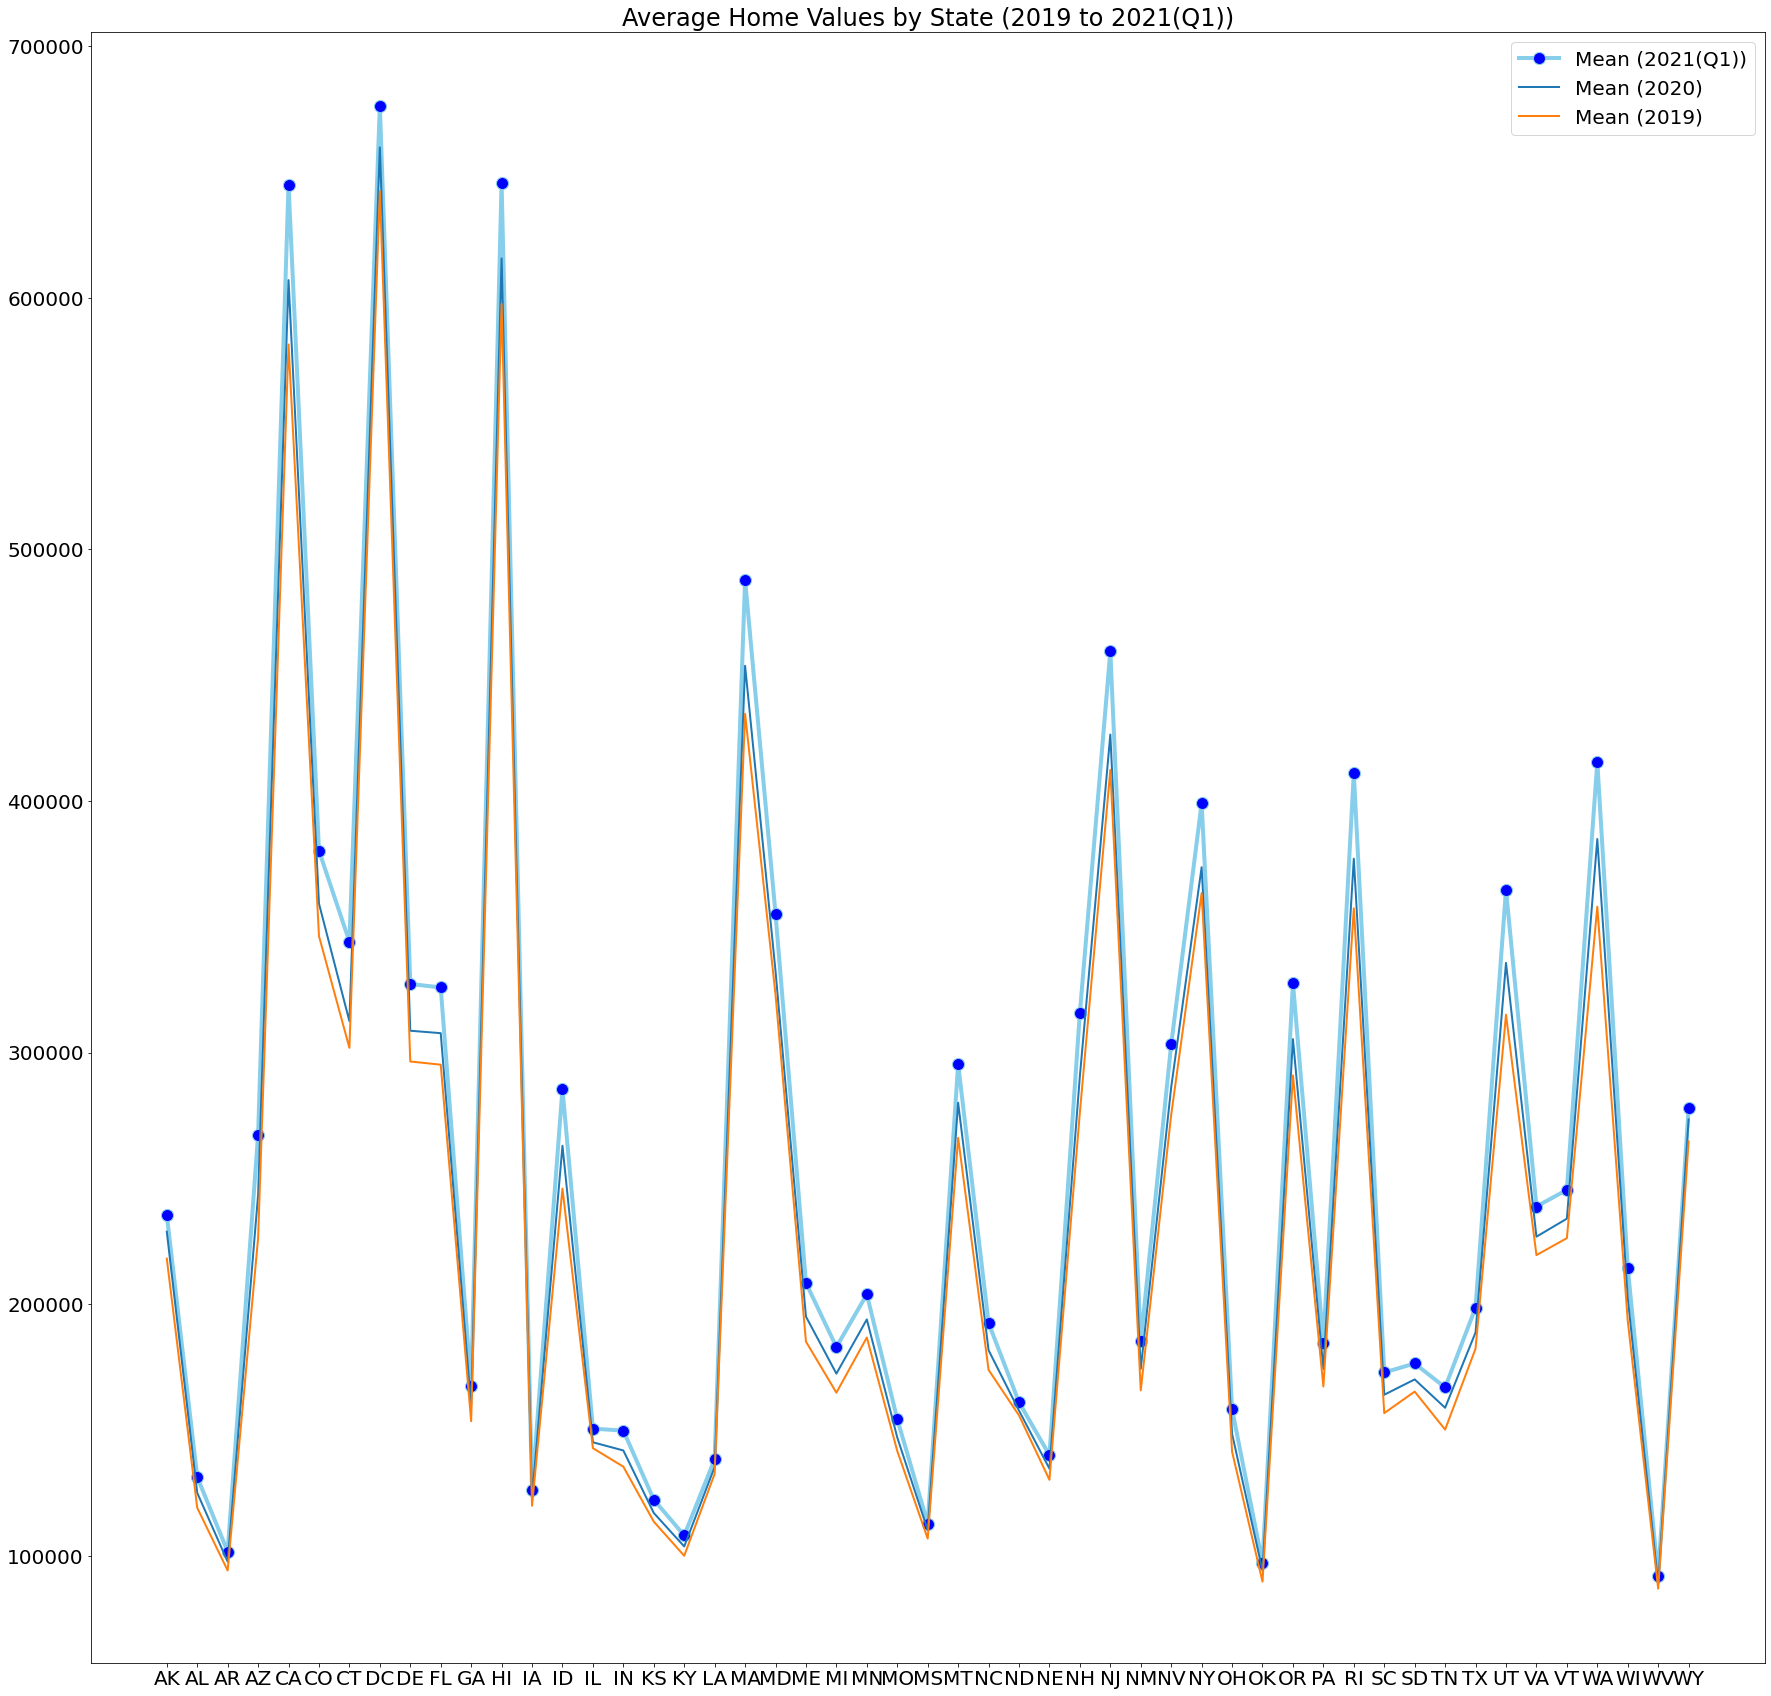

In [183]:
plt.plot('State', 'Mean (2021(Q1))', data=values_by_state, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('State', 'Mean (2020)', data=values_by_state, marker='', markerfacecolor='red', linewidth=2)
plt.plot('State', 'Mean (2019)', data=values_by_state, marker='', markerfacecolor='olive', linewidth=2)
plt.rcParams["figure.figsize"]=(30,30)
plt.rcParams['font.size']=20.0
plt.xticks(fontsize=20)
plt.legend()
plt.savefig("avg_state_line.png")
plt.title('Average Home Values by State (2019 to 2021(Q1))')
plt.show()

In [22]:
airport_values=pd.merge(airport_clean, zillow_values, on=["City","State"])
#[merged_df.AIRPORT.notnull()]
#airports_values

In [23]:
airport_values


,Code,Originating Domestic Passengers 10%,Originating Domestic Passengers,AIRPORT,City,State,LATITUDE,LONGITUDE,RegionID,SizeRank,...,Mean (2012),Mean (2013),Mean (2014),Mean (2015),Mean (2016),Mean (2017),Mean (2018),Mean (2019),Mean (2020),Mean (2021(Q1))
0,LAX,"1,564,494",15644940,Los Angeles International,Los Angeles,CA,33.942536,-118.408074,12447,1,...,416485.42,493353.67,544536.83,576427.25,623041.92,668919.17,721134.42,732166.08,782343.75,829550.00
1,ORD,"1,266,224",12662240,Chicago O'Hare International,Chicago,IL,41.979595,-87.904464,17426,3,...,184164.33,196875.58,214552.33,224916.75,237467.42,252298.67,262238.58,264953.92,271589.33,285978.67
2,MDW,"415,696",4156960,Chicago Midway,Chicago,IL,41.785983,-87.752424,17426,3,...,184164.33,196875.58,214552.33,224916.75,237467.42,252298.67,262238.58,264953.92,271589.33,285978.67
3,DEN,"1,241,394",12413940,Denver Intl,Denver,CO,39.858408,-104.667002,11093,23,...,247212.50,274189.00,302161.25,342154.25,382076.67,417076.42,453043.25,467590.67,482499.83,507819.33
4,ATL,"1,128,009",11280090,William B Hartsfield-Atlanta Intl,Atlanta,GA,33.640444,-84.426944,37211,40,...,142928.00,160335.58,182431.83,199277.67,218493.67,241712.58,272524.75,290175.17,301189.50,316774.00
5,BOS,"1,043,353",10433530,Gen Edw L Logan Intl,Boston,MA,42.364348,-71.005179,44269,26,...,377381.25,416847.67,457587.67,495276.83,542146.50,584287.83,620740.25,635355.42,649539.92,667108.33
6,SFO,"1,013,794",10137940,San Francisco International,San Francisco,CA,37.619002,-122.374843,20330,14,...,758784.92,897839.92,1021956.58,1151025.83,1229407.00,1274183.50,1411683.08,1431359.92,1446011.75,1424391.00
7,SEA,"1,001,502",10015020,Seattle-Tacoma Intl,Seattle,WA,47.448982,-122.309313,16037,24,...,388077.83,443062.67,477629.00,528802.75,605509.67,693766.92,776947.67,748390.75,790284.42,823458.00
8,EWR,"938,695",9386950,Newark Intl,Newark,NJ,40.692497,-74.168661,12970,82,...,196081.58,183548.33,179999.67,188620.17,205006.25,224876.33,249179.58,280363.67,312527.25,343855.00
9,MCO,"873,096",8730960,Orlando International,Orlando,FL,28.428889,-81.316028,13121,20,...,127855.00,152043.58,172382.92,182091.75,199253.17,217937.58,237939.00,251749.75,265039.00,279091.67


In [32]:
airport_values['Mean (2019)'].max()

1431359.92

In [75]:
air_cities = (airport_values['City'].to_list())
air_2018 = (airport_values['Mean (2018)'].to_list())
air_2019 = (airport_values['Mean (2019)'].to_list())
air_2020 = (airport_values['Mean (2020)']).to_list()

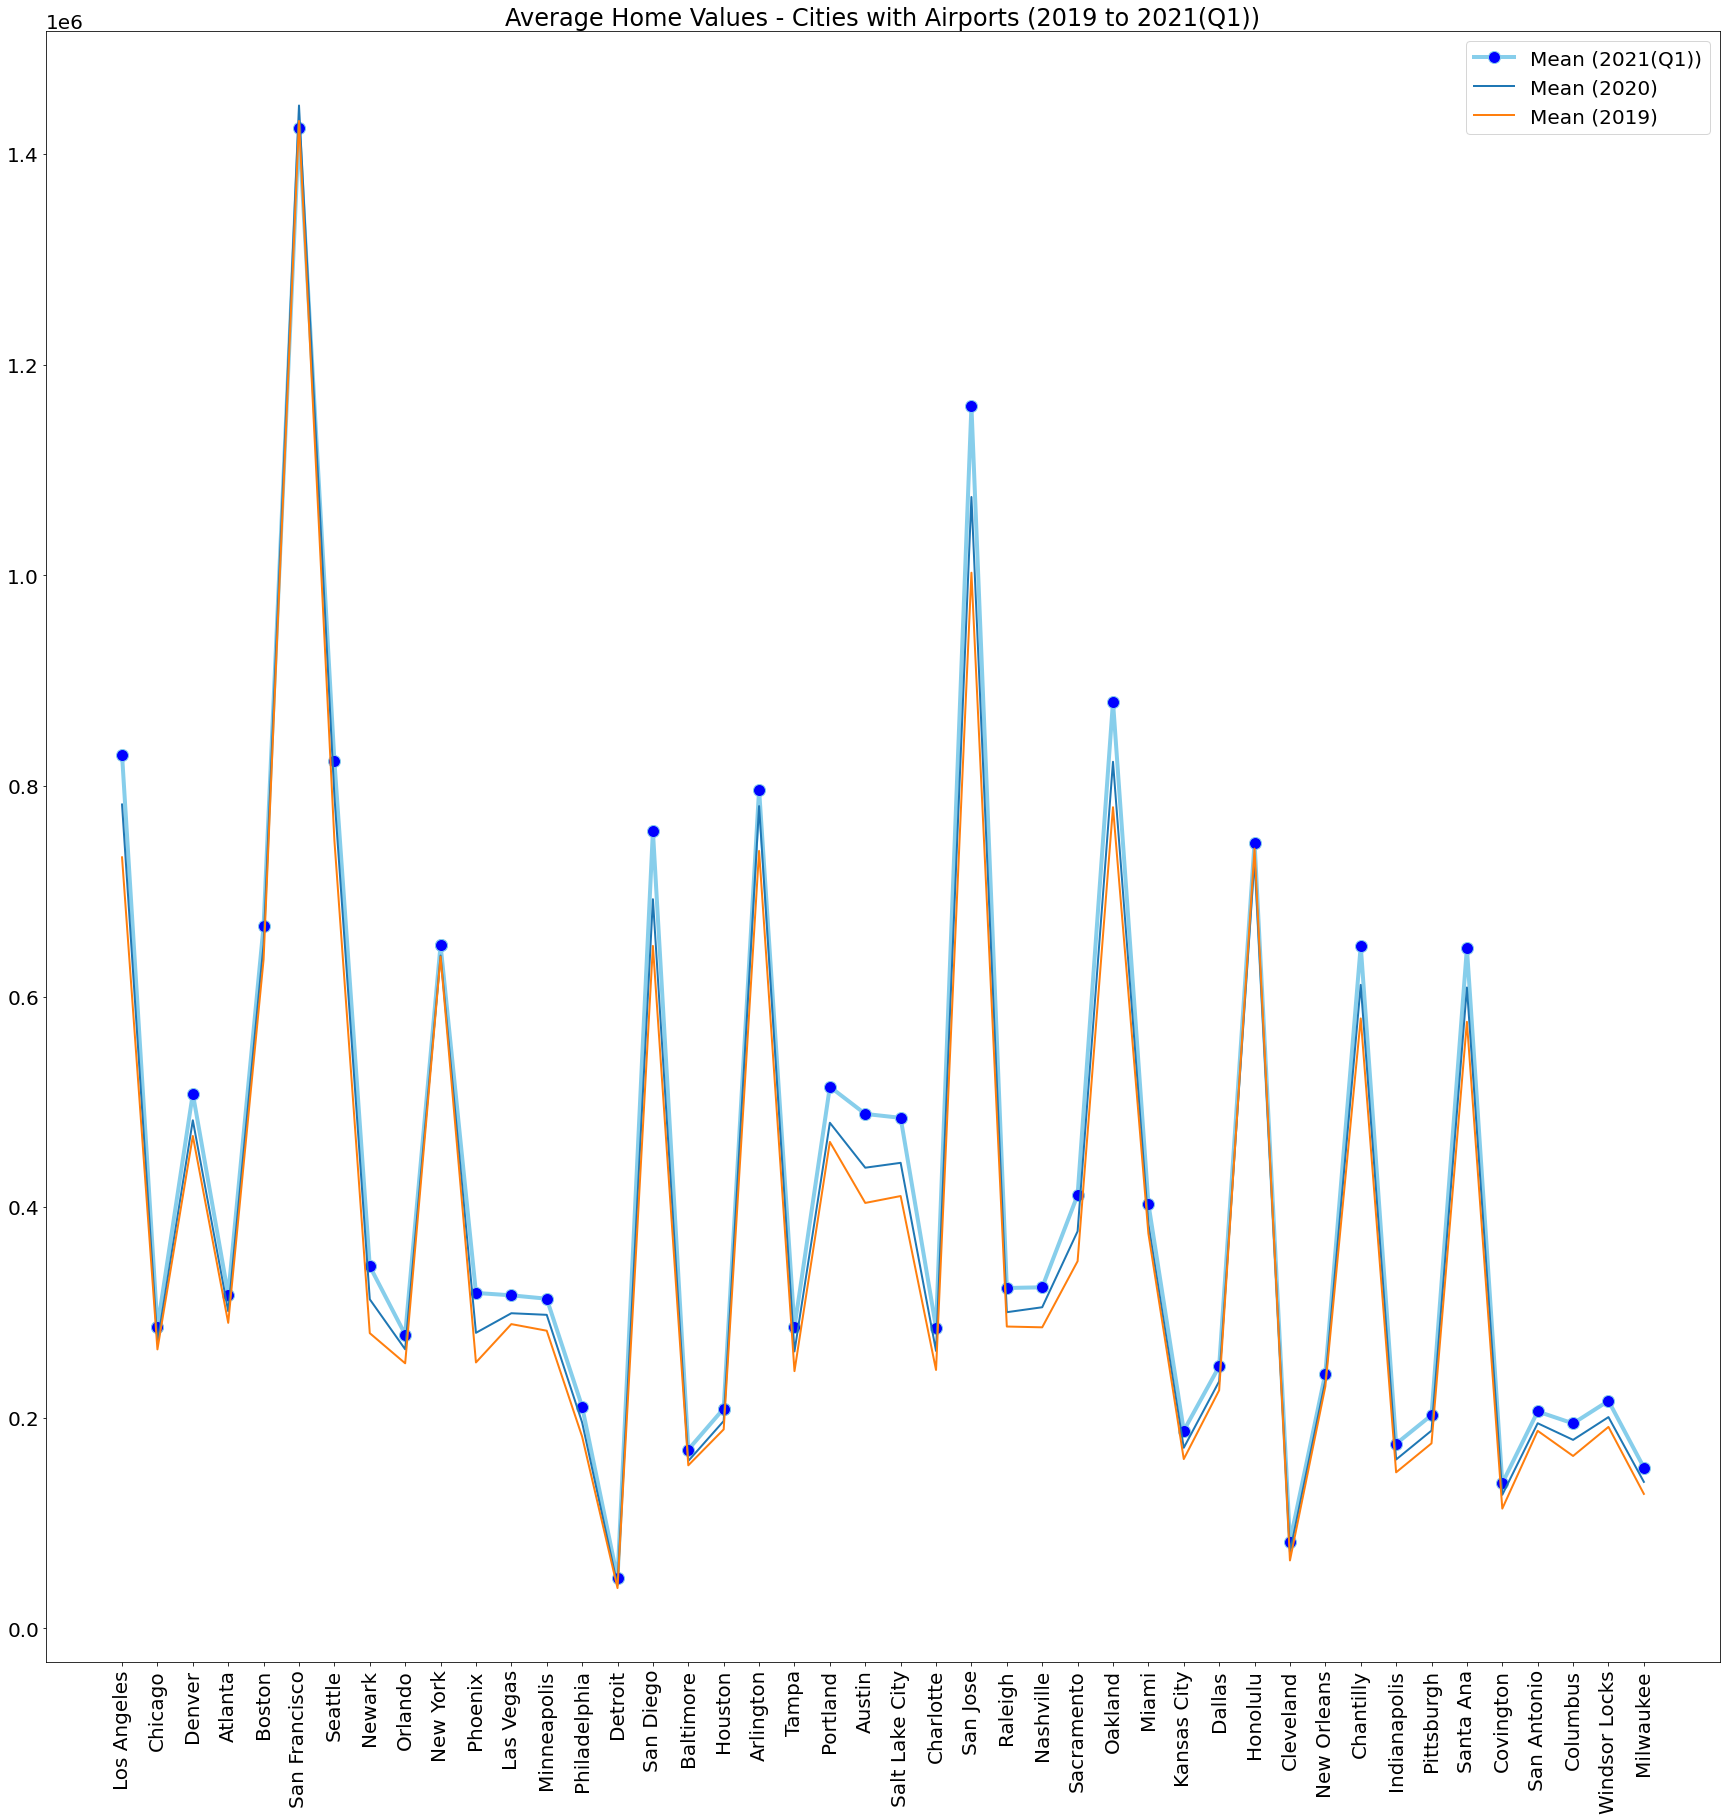

In [182]:
plt.plot('City', 'Mean (2021(Q1))', data=airport_values, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('City', 'Mean (2020)', data=airport_values, marker='', markerfacecolor='red', linewidth=2)
plt.plot('City', 'Mean (2019)', data=airport_values, marker='', markerfacecolor='green', linewidth=2)
plt.rcParams["figure.figsize"]=(30,30)
plt.rcParams['font.size']=20.0
plt.xticks(fontsize=20)
plt.xticks(rotation=90)
plt.legend()
plt.savefig("cities_with_airports_line.png")
plt.title('Average Home Values - Cities with Airports (2019 to 2021(Q1))')
plt.show()

In [24]:
gmaps.configure(api_key=g_key)
fig = gmaps.figure()
#average_value = airports_df['Mean (2010)'].astype(float)
locations = airport_values[['LATITUDE', 'LONGITUDE']]
markers=gmaps.marker_layer(locations)
fig.add_layer(markers)


# Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=average_value, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# Add layer
#fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

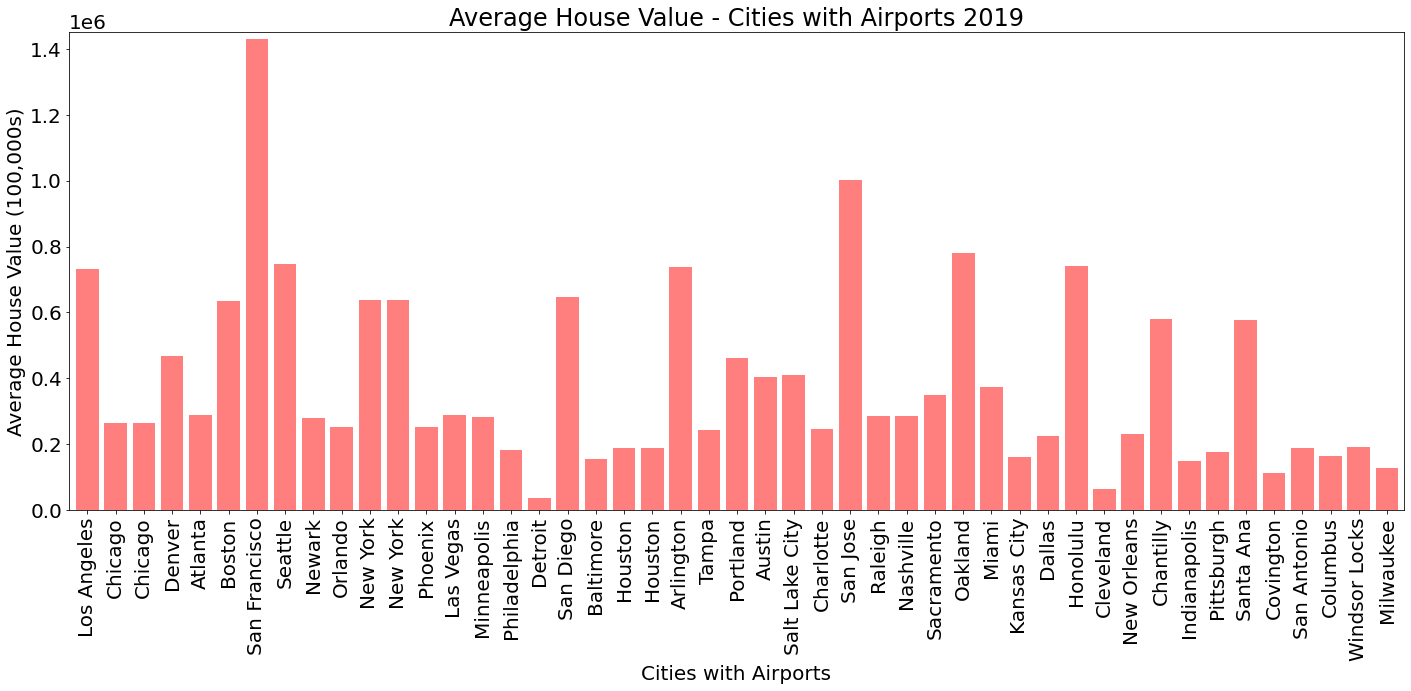

In [222]:
x_axis = np.arange(len(airport_values))
tick_locations = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, airport_values['Mean (2019)'], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, airport_values['City'], rotation="vertical")

plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(airport_values['Mean (2019)']) + 20000)


plt.title('Average House Value - Cities with Airports 2019')
plt.xlabel('Cities with Airports')
plt.ylabel('Average House Value (100,000s)')
plt.tight_layout()
plt.savefig("Avg House Value - Cities with Airports (2019).png")
plt.show()


In [25]:
print(f"Maximum Average Value - City with Airport 2019 = {airport_values['Mean (2019)'].max()}")
print(f"Minimum Average Value - City with Airport 2019 = {airport_values['Mean (2019)'].min()}")

Maximum Average Value - City with Airport 2019 = 1431359.92
Minimum Average Value - City with Airport 2019 = 38353.5


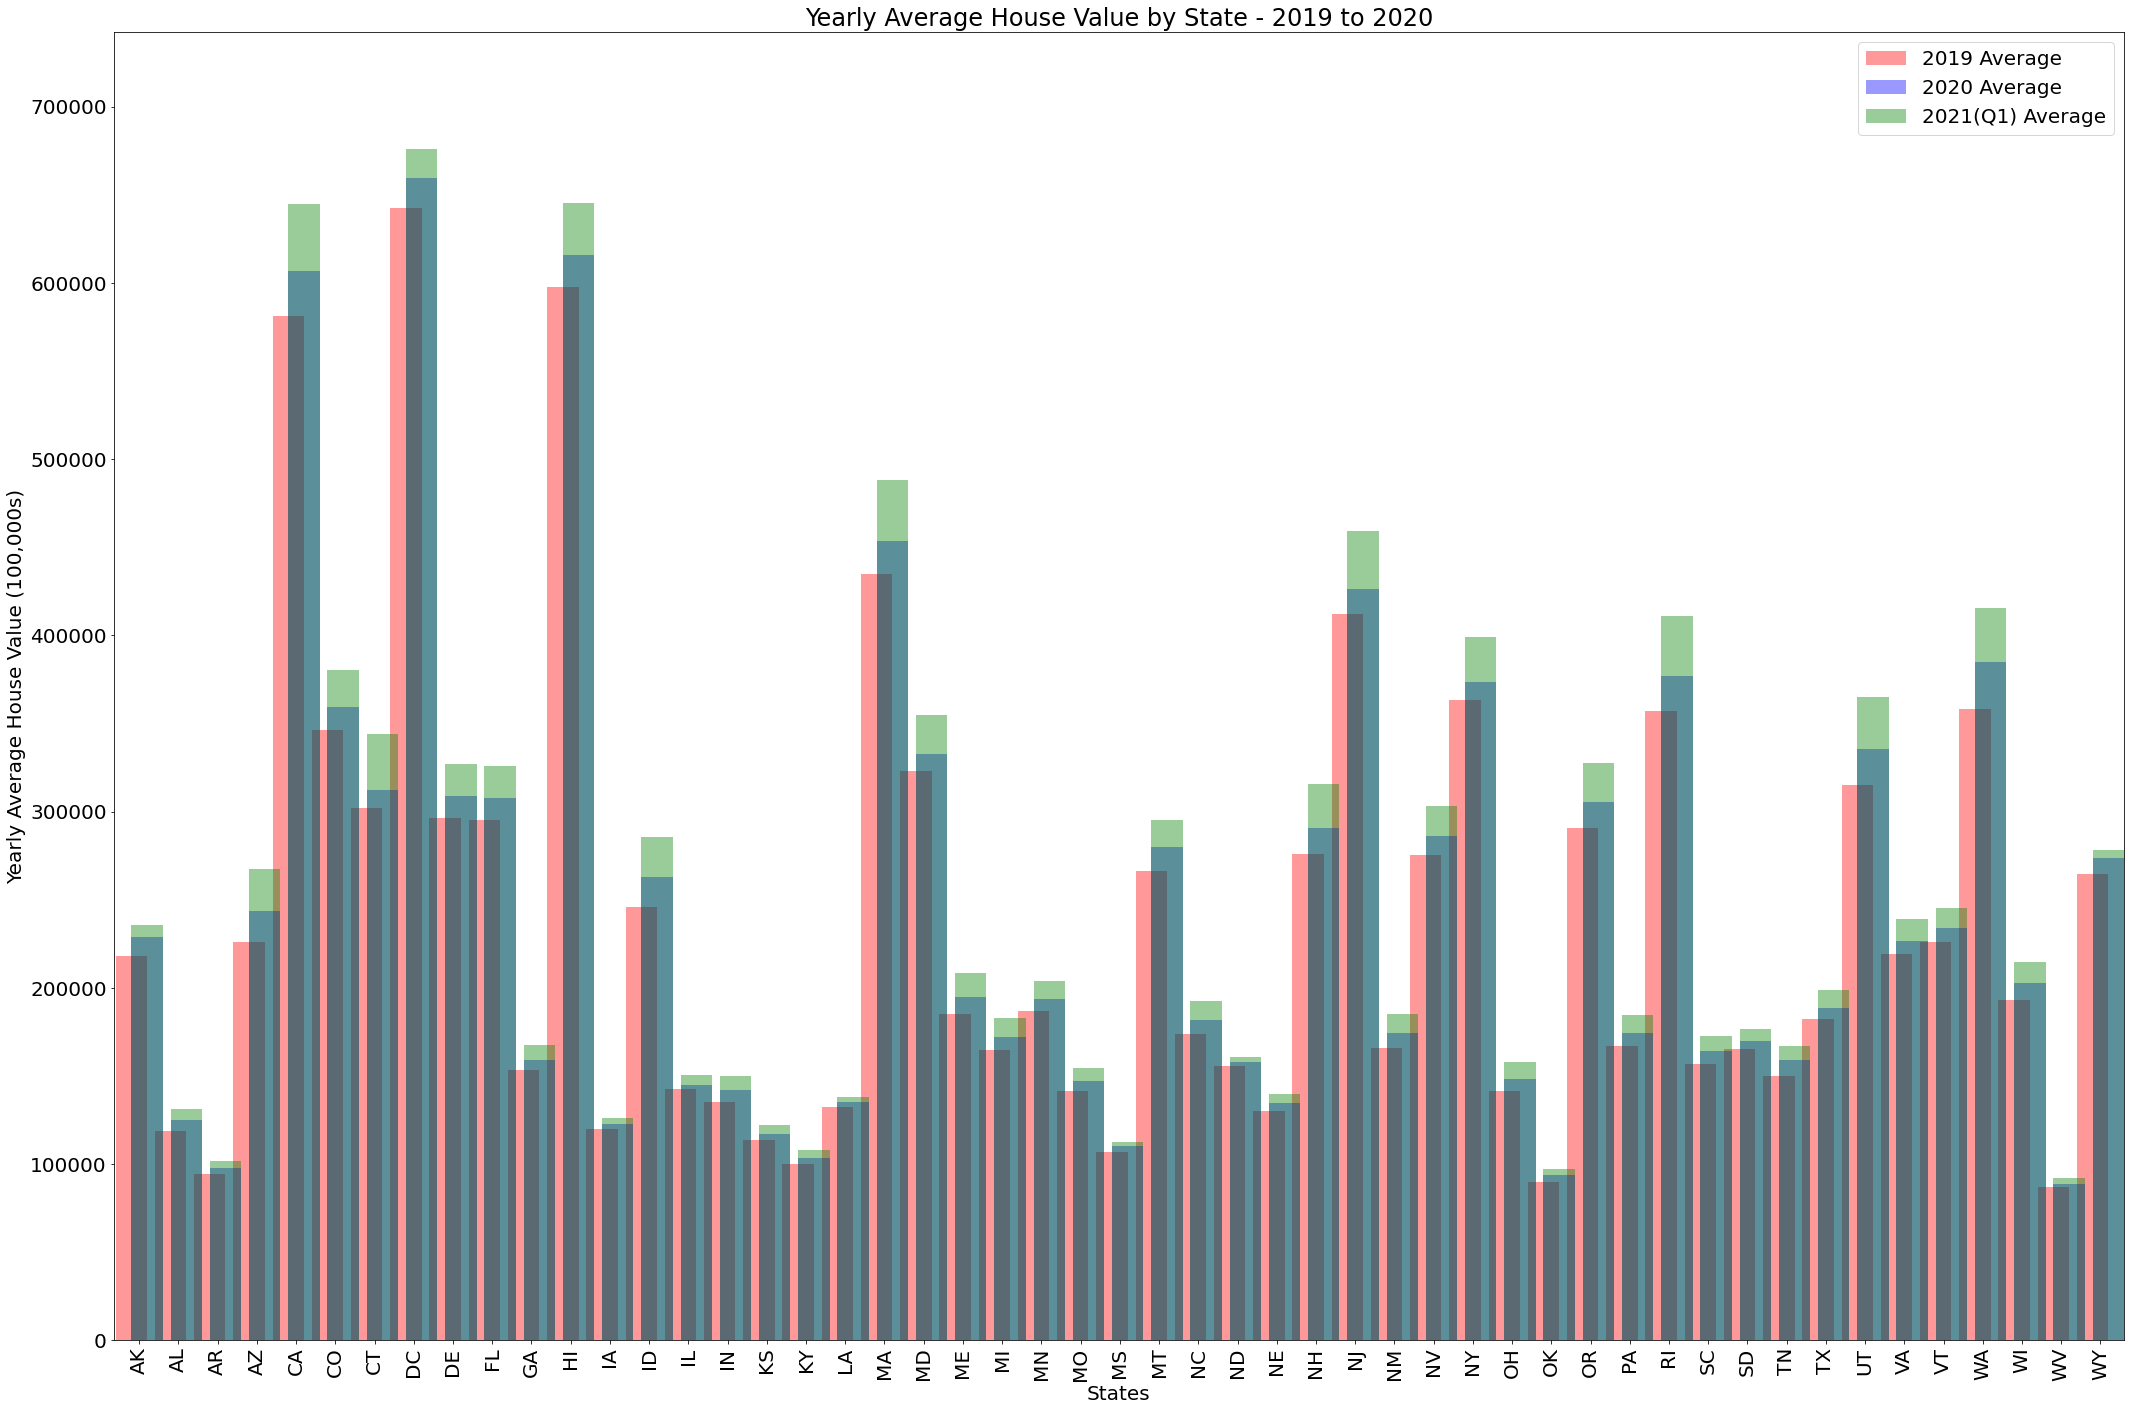

In [203]:
x_axis = np.arange(len(values_by_state))
tick_locations = [value + 0.4 for value in x_axis]
plt.figure(figsize=(30,20))
plt.bar(x_axis - 0.2, values_by_state['Mean (2019)'], color='r', alpha=0.4, align="edge", label="2019 Average")
plt.bar(x_axis + 0.2, values_by_state['Mean (2020)'], color='b', alpha=0.4, align="edge", label="2020 Average")
plt.bar(x_axis + 0.2, values_by_state['Mean (2021(Q1))'], color='g', alpha=0.4, align="edge", label='2021(Q1) Average')
plt.xticks(tick_locations, values_by_state['State'], rotation="vertical")

plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(values_by_state['Mean (2019)']) + 100000)
#plt.ylim(25000000, 40000000000)

         
plt.title('Yearly Average House Value by State - 2019 to 2020')
plt.xlabel('States')
plt.ylabel('Yearly Average House Value (100,000s)')
plt.legend()
plt.tight_layout()
plt.savefig("house_averages_state_barchart.png")
plt.show()

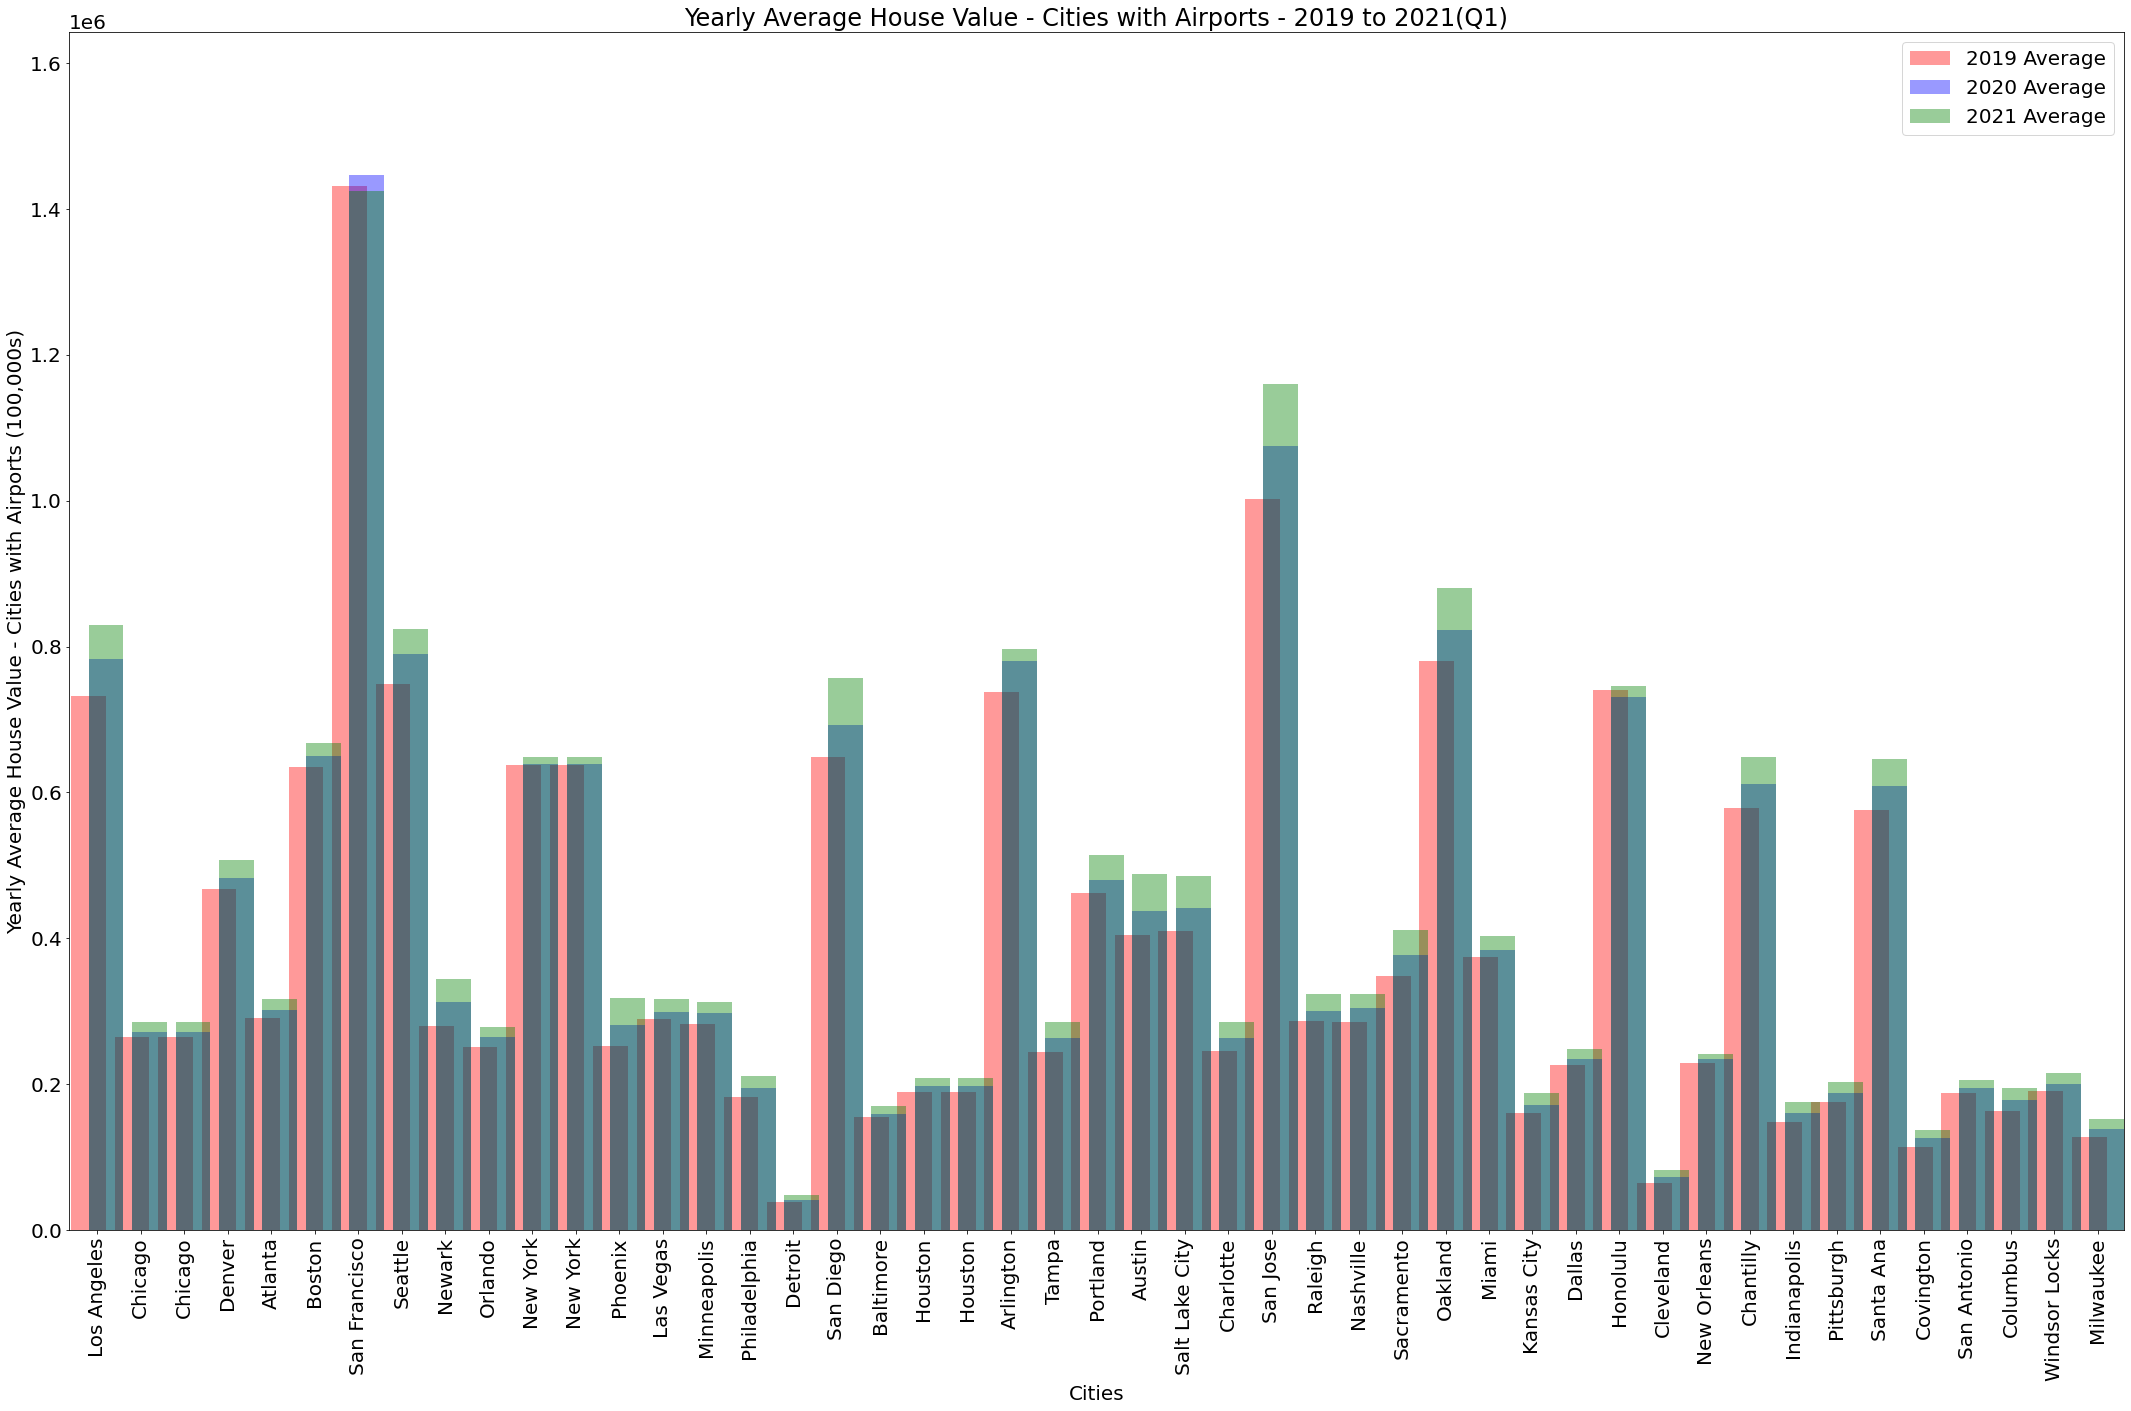

In [223]:
x_axis = np.arange(len(airport_values))
tick_locations = [value + 0.4 for value in x_axis]
plt.figure(figsize=(30,20))
plt.bar(x_axis - 0.2, airport_values['Mean (2019)'], color='r', alpha=0.4, align="edge", label ="2019 Average")
plt.bar(x_axis + 0.2, airport_values['Mean (2020)'], color='b', alpha=0.4, align="edge", label = '2020 Average')
plt.bar(x_axis + 0.2, airport_values['Mean (2021(Q1))'], color='g', alpha=0.4, align="edge", label = '2021 Average')
plt.xticks(tick_locations, airport_values['City'], rotation="vertical")

plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(values_by_state['Mean (2019)']) + 1000000)
#plt.ylim(25000000, 40000000000)

         
plt.title('Yearly Average House Value - Cities with Airports - 2019 to 2021(Q1)')
plt.xlabel('Cities')
plt.ylabel('Yearly Average House Value - Cities with Airports (100,000s)')
plt.legend()
plt.tight_layout()
plt.savefig("cities_with_airports_barchart.png")
plt.show()

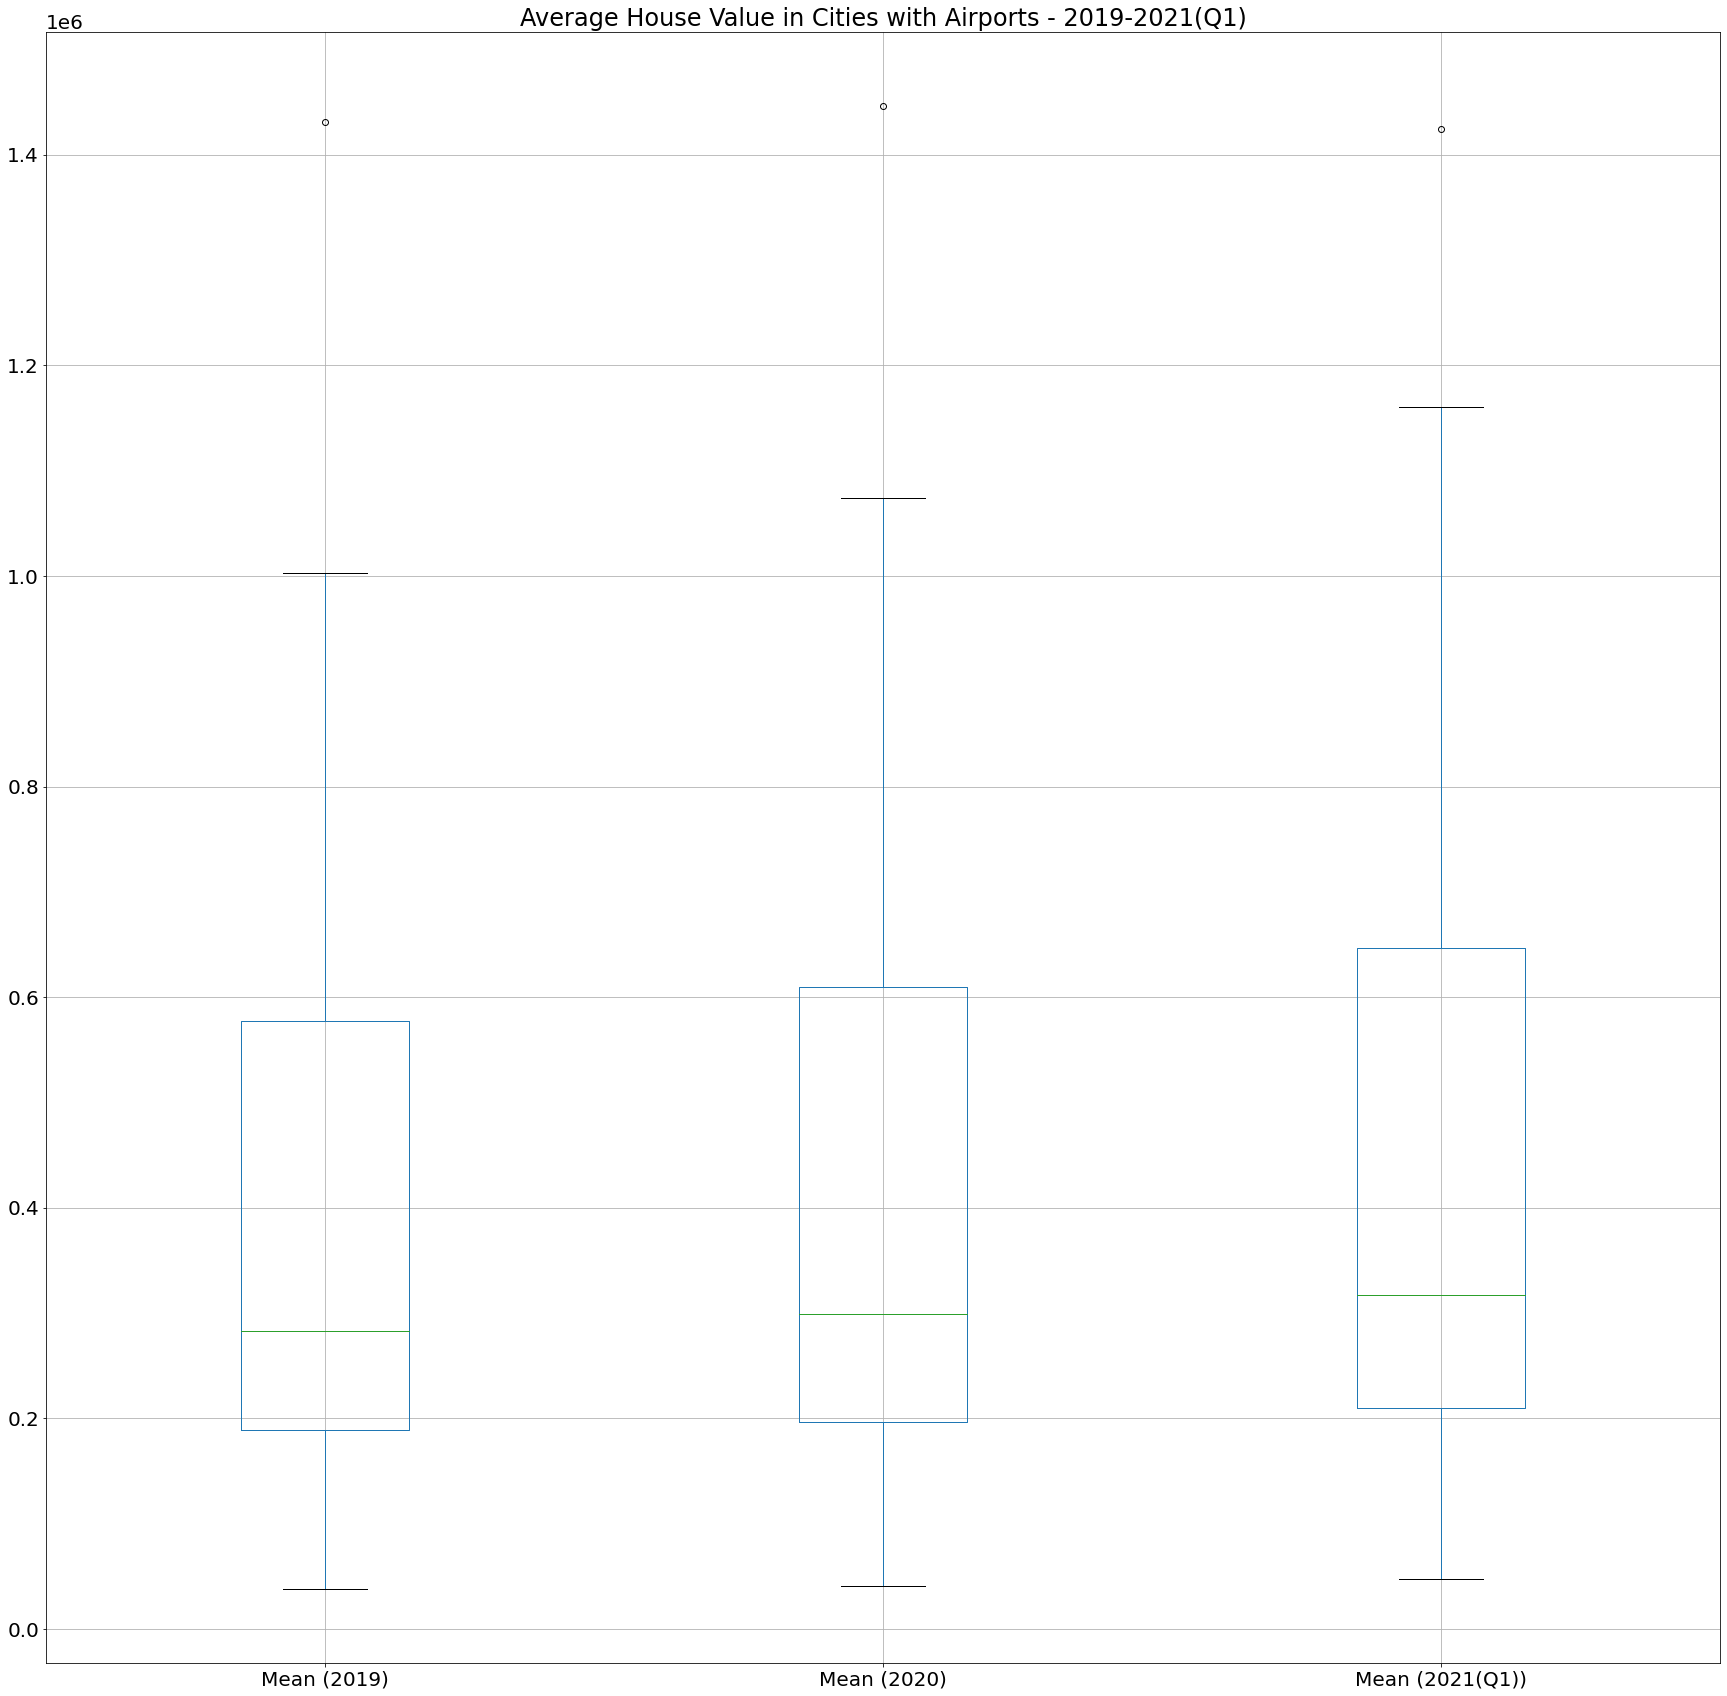

In [200]:
np.random.seed(1234)
boxplot=airport_values.boxplot(column=["Mean (2019)", "Mean (2020)", "Mean (2021(Q1))"])
boxplot.plot()
plt.title('Average House Value in Cities with Airports - 2019-2021(Q1)')
plt.savefig("cities_with_airports_boxplot.png")
plt.show()

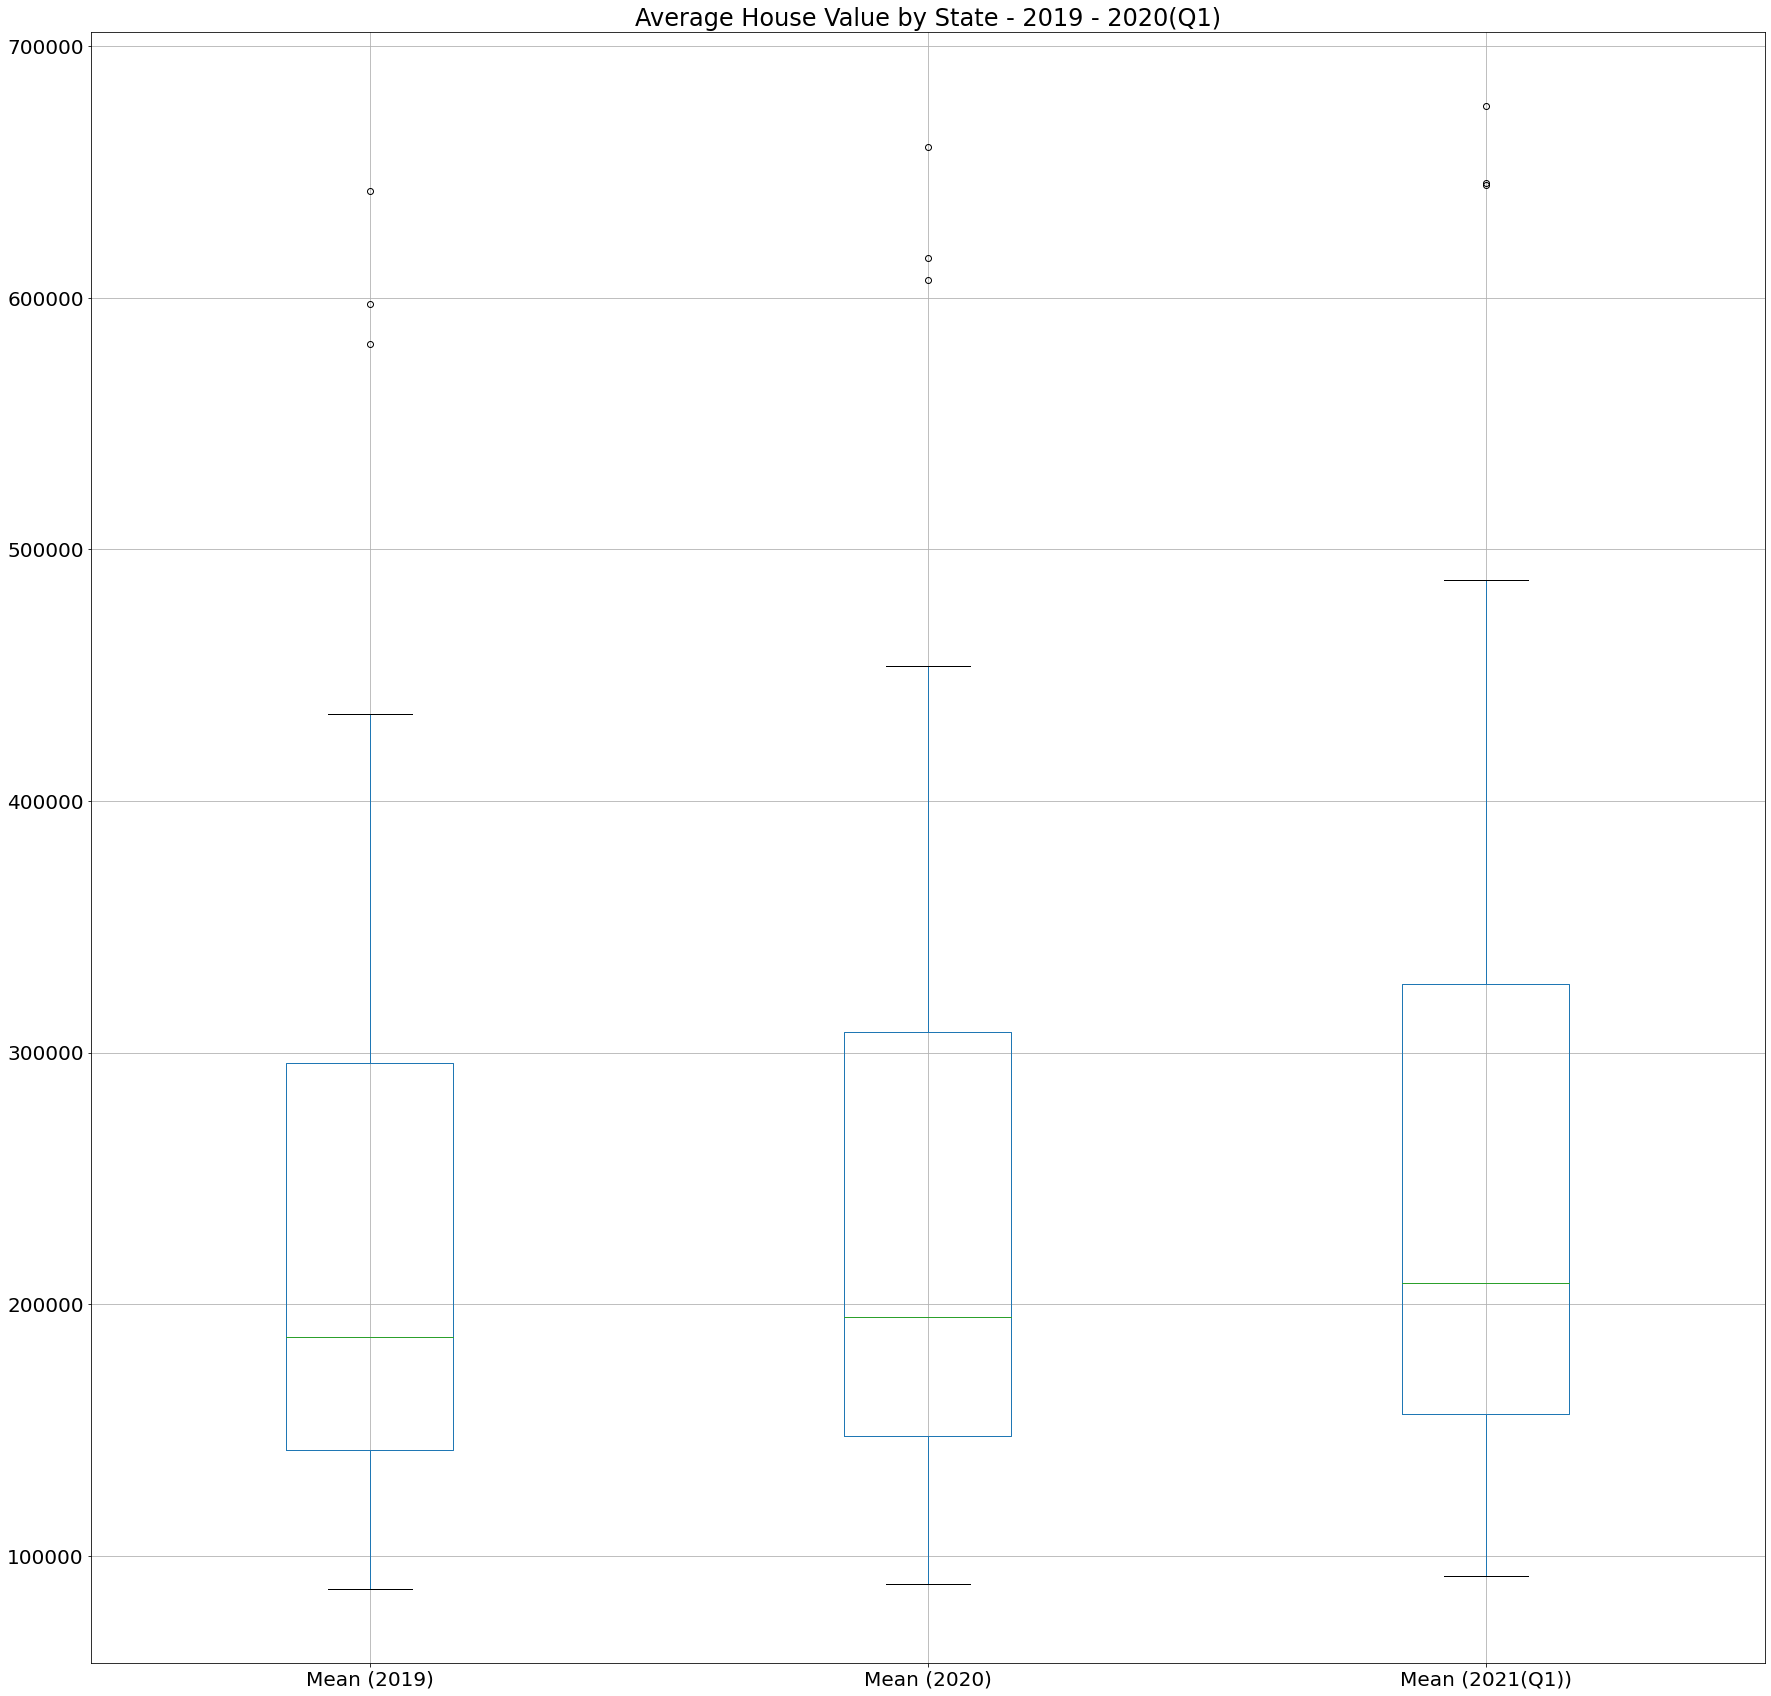

In [202]:
np.random.seed(1234)
boxplot=values_by_state.boxplot(column=["Mean (2019)", "Mean (2020)", 'Mean (2021(Q1))'])
boxplot.plot()
plt.title('Average House Value by State - 2019 - 2020(Q1)')
plt.savefig("avg_value_state_boxplot.png")
plt.show()

In [27]:
print(f"Maximum Average Value - City with Airport 2020 = {airport_values['Mean (2020)'].max()}")
print(f"Minimum Average Value - City with Airport 2020 = {airport_values['Mean (2020)'].min()}")

Maximum Average Value - City with Airport 2020 = 1446011.75
Minimum Average Value - City with Airport 2020 = 40985.0


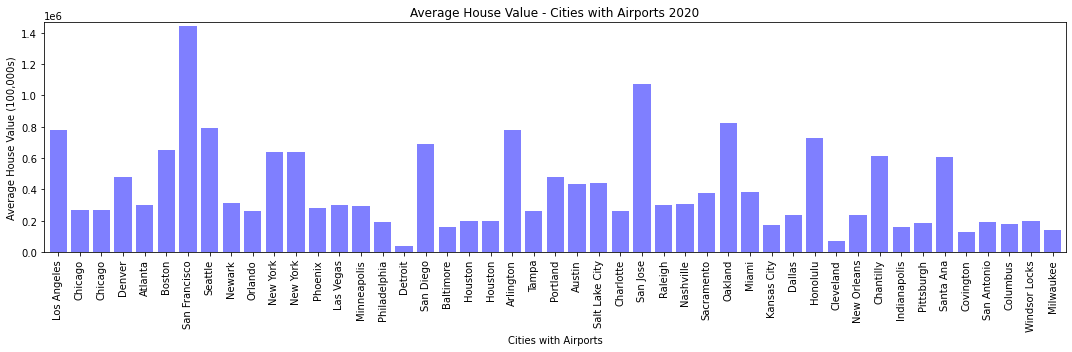

In [28]:
x_axis = np.arange(len(airport_values))
tick_locations = [value + 0.4 for value in x_axis]
plt.figure(figsize=(15,5))
plt.bar(x_axis, airport_values['Mean (2020)'], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, airport_values['City'], rotation="vertical")

plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(airport_values['Mean (2020)']) + 20000)
plt.title('Average House Value - Cities with Airports 2020')
plt.xlabel('Cities with Airports')
plt.ylabel('Average House Value (100,000s)')
plt.tight_layout()
plt.savefig("Avg House Value - Cities with Airports (2020).png")
plt.show()


In [29]:
print(f"Maximum Average House Value by State 2019 = {values_by_state['Mean (2019)'].max()}")
print(f"Minimum Average House Value by State 2019 = {values_by_state['Mean (2019)'].min()}")

Maximum Average House Value by State 2019 = 642363.17
Minimum Average House Value by State 2019 = 86937.95


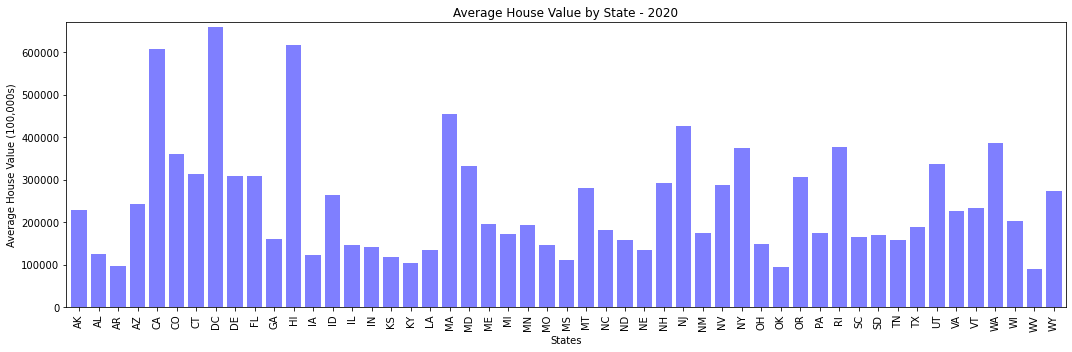

In [30]:
x_axis = np.arange(len(values_by_state))
tick_locations = [value + 0.4 for value in x_axis]
plt.figure(figsize=(15,5))
plt.bar(x_axis, values_by_state['Mean (2020)'], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, values_by_state['State'], rotation="vertical")

plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(values_by_state['Mean (2020)']) + 10000)
#plt.ylim(25000000, 40000000000)

         
plt.title('Average House Value by State - 2020')
plt.xlabel('States')
plt.ylabel('Average House Value (100,000s)')
plt.tight_layout()
plt.savefig("Avg House Value by State (2020).png")
plt.show()

In [31]:
print(f"Maximum Average House Value by State 2020 = {values_by_state['Mean (2020)'].max()}")
print(f"Minimum Average House Value by State 2020 = {values_by_state['Mean (2020)'].min()}")

Maximum Average House Value by State 2020 = 659773.83
Minimum Average House Value by State 2020 = 88915.91


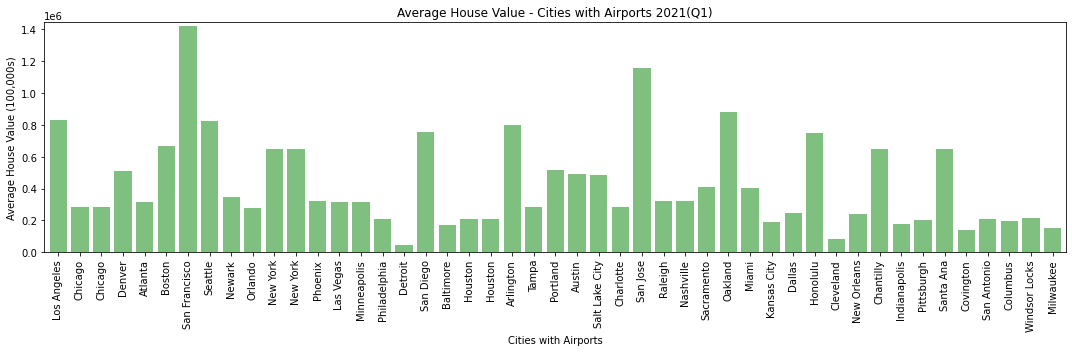

In [32]:
x_axis = np.arange(len(airport_values))
tick_locations = [value + 0.4 for value in x_axis]
plt.figure(figsize=(15,5))
plt.bar(x_axis, airport_values['Mean (2021(Q1))'], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, airport_values['City'], rotation="vertical")

plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(airport_values['Mean (2021(Q1))']) + 20000)
plt.title('Average House Value - Cities with Airports 2021(Q1)')
plt.xlabel('Cities with Airports')
plt.ylabel('Average House Value (100,000s)')
plt.tight_layout()
plt.savefig("Avg House Value - Cities with Airports (2021(Q1)).png")
plt.show()


In [33]:
print(f"Maximum Average Value - City with Airport 2021(Q1) = {airport_values['Mean (2021(Q1))'].max()}")
print(f"Minimum Average Value - City with Airport 2021(Q1) = {airport_values['Mean (2021(Q1))'].min()}")

Maximum Average Value - City with Airport 2021(Q1) = 1424391.0
Minimum Average Value - City with Airport 2021(Q1) = 47612.0


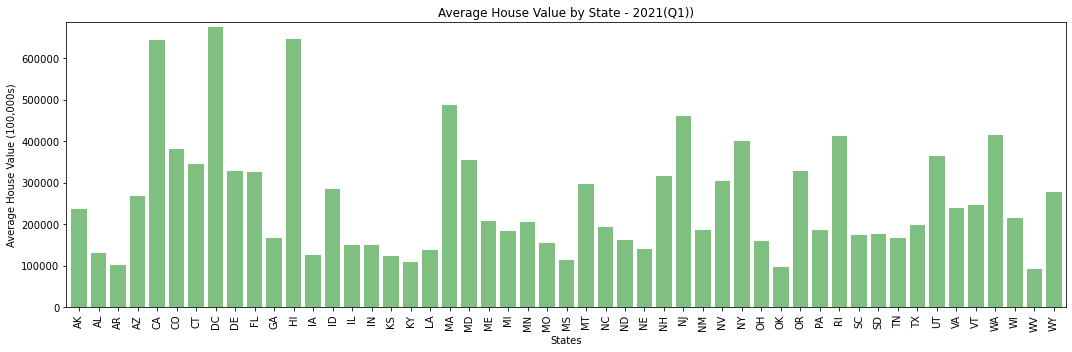

In [41]:
x_axis = np.arange(len(values_by_state))
tick_locations = [value + 0.4 for value in x_axis]
plt.figure(figsize=(15,5))
plt.bar(x_axis, values_by_state['Mean (2021(Q1))'], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, values_by_state['State'], rotation="vertical")

plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(values_by_state['Mean (2021(Q1))']) + 10000)
#plt.ylim(25000000, 40000000000)

         
plt.title('Average House Value by State - 2021(Q1))')
plt.xlabel('States')
plt.ylabel('Average House Value (100,000s)')
plt.tight_layout()
plt.savefig("Avg House Value by State (2021(Q1)).png")
plt.show()

In [42]:
print(f"Maximum Average House Value by State 2021(Q1) = {values_by_state['Mean (2021(Q1))'].max()}")
print(f"Minimum Average House Value by State 2021(Q1) = {values_by_state['Mean (2021(Q1))'].min()}")

Maximum Average House Value by State 2021(Q1) = 676184.67
Minimum Average House Value by State 2021(Q1) = 91932.96


In [43]:
state_max_2019=values_by_state['Mean (2019)'].max()
state_min_2019=values_by_state['Mean (2019)'].min()

state_max_2020=values_by_state['Mean (2020)'].max()
state_min_2020=values_by_state['Mean (2020)'].min()

state_max_2021=values_by_state['Mean (2021(Q1))'].max()
state_min_2021=values_by_state['Mean (2021(Q1))'].min()

In [56]:
print(f"Maximum Average House Value by State (2019-2021(Q1)) -- {state_max_2019}, {state_max_2020}, {state_max_2021}")
print(f"Minimum Average House Value by State (2019-2021(Q1)) -- {state_min_2019}, {state_min_2020}, {state_min_2021}")

Maximum Average House Value by State (2019-2021(Q1)) -- 642363.17, 659773.83, 676184.67
Minimum Average House Value by State (2019-2021(Q1)) -- 86937.95, 88915.91, 91932.96


In [46]:
air_max_2019=airport_values['Mean (2019)'].max()
air_min_2019=airport_values['Mean (2019)'].min()

air_max_2020=airport_values['Mean (2020)'].max()
air_min_2020=airport_values['Mean (2020)'].min()

air_max_2021=airport_values['Mean (2021(Q1))'].max()
air_min_2021=airport_values['Mean (2021(Q1))'].min()

In [57]:
print(f"Maximum Average House Value - City with Airport (2019-2021(Q1)) -- {air_max_2019}, {air_max_2020}, {air_max_2021}")
print(f"Minimum Average House Value - City with Airport (2019-2021(Q1)) -- {air_min_2019}, {air_min_2020}, {air_min_2021}")

Maximum Average House Value - City with Airport (2019-2021(Q1)) -- 1431359.92, 1446011.75, 1424391.0
Minimum Average House Value - City with Airport (2019-2021(Q1)) -- 38353.5, 40985.0, 47612.0


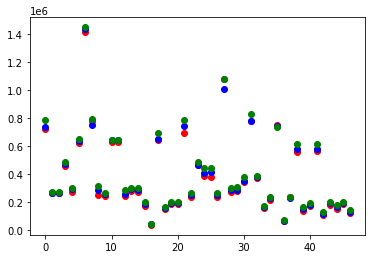

In [76]:
#years_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
x_axis = np.arange(len(air_2019))
values1 = air_2018
values2 = air_2019
values3 = air_2020
plt.scatter(x_axis, values1, marker='o', color='red')
plt.scatter(x_axis, values2, marker='o', color='blue')
plt.scatter(x_axis, values3, marker='o', color='green')
plt.show()

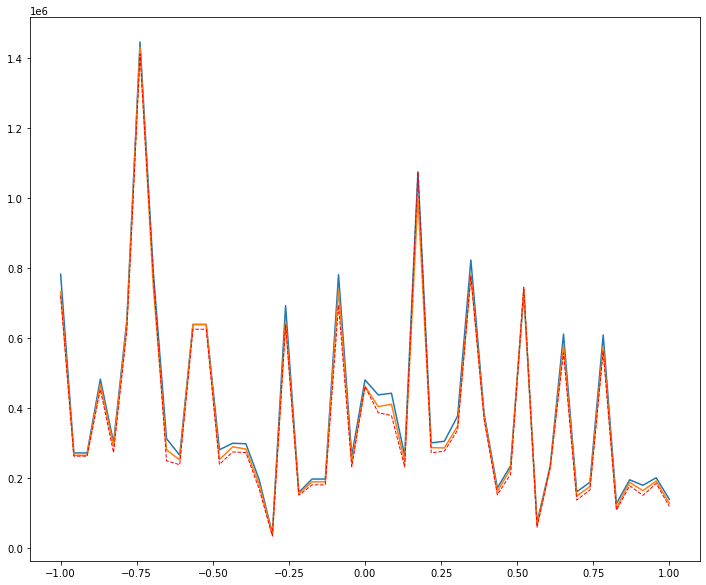

In [79]:
x = np.linspace(-1, 1, 47)
y1 = values1
y2 = values2
y3 = values3
plt.figure(num = 3, figsize=(12, 10))
plt.plot(x, y3)
plt.plot(x, y2)
plt.plot(x, y1, 
         color='red',   
         linewidth=1.0,  
         linestyle='--' 
        )

plt.show()